# GOAT Talk: The Best NBA Draft Class

### Introduction

Inside the NBA is the best show on TV. Well, it’s the best show if you love basketball. The Emmy Award-winning program follows the pre-game and post-game analysis of some of the NBA’s biggest games of the year. Hosted by Ernie Johnson, the show covers a variety of NBA topics including the input of the other studio analysts: former NBA champions Shaquille “Shaq” O’Neal and Kenny “The Jet” Smith. Oh, and some guy named Charles Barkley. What makes this show so compelling for basketball fans is the chemistry between the analysts. The show consists of 70% basketball, 25% talking non-sense (mostly trash talk) and 5% Ernie trying to get everyone to stay on topic. One second the crew will be talking about Game 2 of the Western Conference Finals, then switch over to talking about how often you should fill up your gas tank. Seriously, they spent 2 minutes talking about that!

One of the ongoing topics the Inside the NBA crew bring up in what seems like all the time is the debate of old school vs new school. Shaq, Kenny, and Charles will go on for days talking about how NBA players of their era were better, tougher, and blah blah blah. Now, I’m going to test that debate with data analysis. What better way to settle this debate with some Python! Okay, it might now sound like too much fun, but I'll try to make this analysis worth the time.

To conduct this analysis, we will only be looking at the 3 best NBA draft classes (not debatable): 1984, 1996, and 2003. Why? Well, they each have some of the greatest players of all time. 1984 has Hakeem Abdul Olajuwon, Charles Barkley, and of course Michael “GOAT” Jordan (debatable? Maybe). 1996 has Allen Iverson, Steve Nash, and Kobe Bryant. 2003 has Dwayne Wade, Chris Bosh, and LeBron “LABron” James (yes, I’m a Lakers fan). Aside from being the best draft classes ever, these draft classes each represent different era’s of the NBA.

The data for the analysis comes directly from Basketball Reference. Basketball Reference provides stats for fans and analysts directly from their website, which means all stats are official. It also includes the fact that the Golden State Warriors blew a 3-1 lead to the Cleveland Cavaliers in the 2016 NBA Finals. But I think that discussion is for another time.

### Data Cleaning

We start our analysis by organizing the data.

The first dataset, which we’ll name *seasons*, has all NBA player stats from the past 68 years, starting with the 1950 season and ending with the 2016 season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seasons = pd.read_csv('Seasons_Stats.csv')
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Right away, we know we will not be needing a lot of this data. Our analysis will focus on players from the 1980s and beyond. Therefore, we’ll only include player stats from that time period.

In [2]:
years = list(range(1980,2018))
seasons = seasons[seasons['Year'].isin(years)]
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


There are different types of players during an NBA season. There are All Star caliber players, role players, and benchwarmers. The latter is not really that important (unless you have Robert Sacre on your team). For this analysis, I want to focus on players that had some sort of impact. Therefore, I will include players that played at least 1000 minutes during the NBA season.

In [3]:
seasons = seasons[seasons['MP'] > 1000]
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5734,5734,1980.0,Greg Ballard,SF,25.0,WSB,82.0,NaN,2438.0,18.1,...,0.753,240.0,398.0,638.0,159.0,90.0,36.0,133.0,197.0,1277.0


Another aspect that I will need to exclude from our analysis is season totals. Whenever a player plays for 2 or more teams during an NBA season via trade or buyouts, a new row is added to show the players season totals. For example, in 2013 Jonathan Clay Redick, also known as J.J. Redick (you probably had no idea his name was Jonathan), was traded from the Orlando Magic to the Milwaukee Bucks right before the trade deadline. Therefore, on the dataset there are multiple entries for the same seasons (including a totals entry).

In [4]:
seasons[(seasons['Player'] == 'J.J. Redick') & (seasons['Year'] > 2013)]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23352,23352,2015.0,J.J. Redick,SG,30.0,LAC,78.0,78.0,2409.0,16.2,...,0.901,22.0,145.0,167.0,137.0,39.0,8.0,95.0,134.0,1277.0
23961,23961,2016.0,J.J. Redick,SG,31.0,LAC,75.0,75.0,2097.0,17.5,...,0.888,10.0,129.0,139.0,106.0,42.0,5.0,78.0,135.0,1226.0
24551,24551,2017.0,J.J. Redick,SG,32.0,LAC,78.0,78.0,2198.0,14.8,...,0.891,11.0,160.0,171.0,110.0,55.0,13.0,98.0,125.0,1173.0


I will remove these rows since we will be grouping the stats by player later in the analysis. Also, I will remove a special character that is included on some player names.

In [5]:
seasons = seasons[seasons['Tm'] != 'TOT']
seasons['Player'] = seasons['Player'].str.replace('*','') ### Remove special character
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5734,5734,1980.0,Greg Ballard,SF,25.0,WSB,82.0,NaN,2438.0,18.1,...,0.753,240.0,398.0,638.0,159.0,90.0,36.0,133.0,197.0,1277.0


The second dataset consists of player information, including the time period in which the player played in the NBA. For the analysis, I will include every player drafted in 1984, 1996, and 2003. Here, I chose the draft year by inlcuding each player's rookie year. For example, Michael Jordan was drafted in 1984, but on the dataset his rookie year is noted as 1985.

In [6]:
players = pd.read_csv('player_data.csv')
years_draft = [1985, 1997, 2004]
players.columns = ['Player', 'Rookie Year', 'Final Year', 'Position', 'Height','Weight','DOB','College']
players = players[players['Rookie Year'].isin(years_draft)]
players['Player'] = players['Player'].str.replace('*','') ### Remove special character

For the last part of the data cleaning process, I will create a new data table that includes some of the stats we will be analyzing. Since I will be comparing career stats of NBA players by draft class, I will group the stats by draft class.

In [7]:
data = seasons[['Year', 'Player','G','MP','PER', 'TS%', 'FG%', '3P%','2P%', 'eFG%','OWS', 'DWS', 'WS', 'WS/48',
                'USG%','OBPM', 'DBPM', 'BPM', 'VORP']]
data = data[data['Year'].isin(years)]
data['Year'] = data['Year'].astype(object)

data_draft = players.merge(data, on = 'Player')
data_draft['Rookie Year'] = data_draft['Rookie Year'] - 1 ### Set the Year to the correct draft class

f = {'G': ['sum'],'MP': ['sum'],'PER': ['mean'], 'TS%': ['mean'], 'FG%': ['mean'], '3P%': ['mean'],'2P%': ['mean'], 
     'eFG%': ['mean'],'OWS': ['mean'], 'DWS': ['mean'], 'WS': ['mean'], 'WS/48': ['mean'],'USG%': ['mean'],
     'OBPM': ['mean'], 'DBPM': ['mean'], 'BPM': ['mean'], 'VORP': ['mean']}
data_draft = data_draft.groupby(['Rookie Year'], as_index = False).agg(f)



career = players.merge(data, on = 'Player')
career['Rookie Year'] = data_draft['Rookie Year'] - 1 ### Set the Year to the correct draft class
career = career.groupby(['Player'], as_index = False).agg(f)

### Analysis

How do we determine which draft class is the best? It’s easy to simply just compare the career points, rebounds, and assists totals of players from each draft. Does that actually tell us that players from a certain draft class is better than the others? Probably not. In order to analyze the draft classes, I want to use stats that take into consideration other aspects of the game. Of the stats we have in our dataset, these 3 stats are probably best for the analysis: Player Efficiency Rating (PER), Value Over Replacement Player (VORP), and Win Shares Per 48 Minutes (WS/48).

#### Player Efficiency Rating (PER)

[PER](https://www.basketball-reference.com/about/per.html) is stat created by John Hollinger that takes into account accomplishments, such as field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls.

Text(0,0.5,'PER')

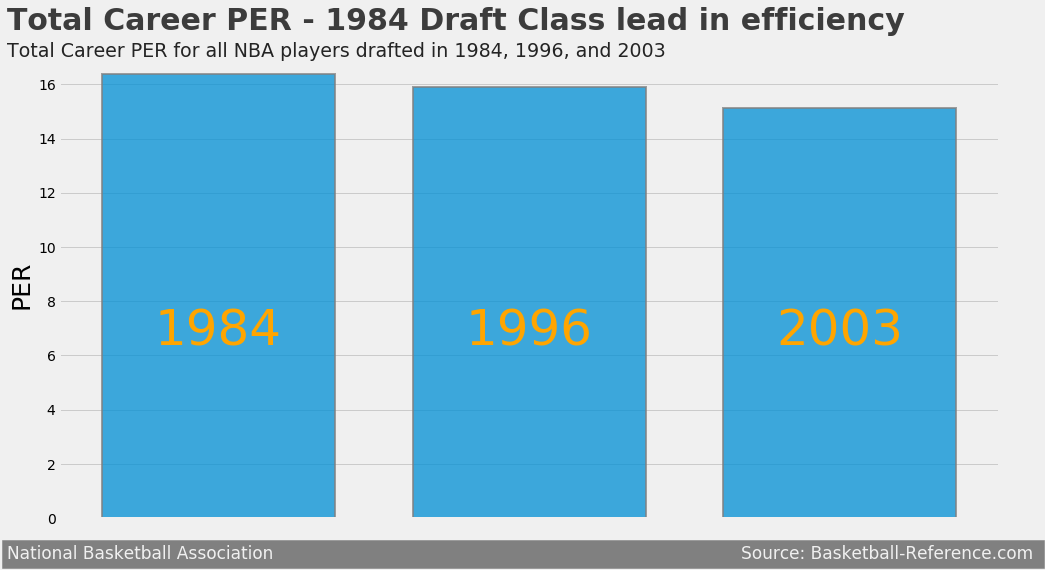

In [8]:
per = data_draft.sort_values([('PER','mean')], ascending = False).reset_index()
pos = list(range(len(per['PER','mean'])))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, per['PER','mean'], width = 0.75, alpha = 0.75, label = per['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos:
    plt.text(pos[i], 6, s = per['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size = 50)
plt.text(x = -0.68, y = 18, s = 'Total Career PER - 1984 Draft Class lead in efficiency',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.68, y = 17, s = 'Total Career PER for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.68, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('PER', size = 25)

#### Value Over Replacement Player (VORP)

[VORP](https://www.basketball-reference.com/leaders/vorp_career.html) is a box score estimate of the points per 100 team possessions that a player contributed above a replacement level player, translated to an average team and prorated to an 82-game season. It is equivalent to WAR in baseball.

Text(0,0.5,'VORP')

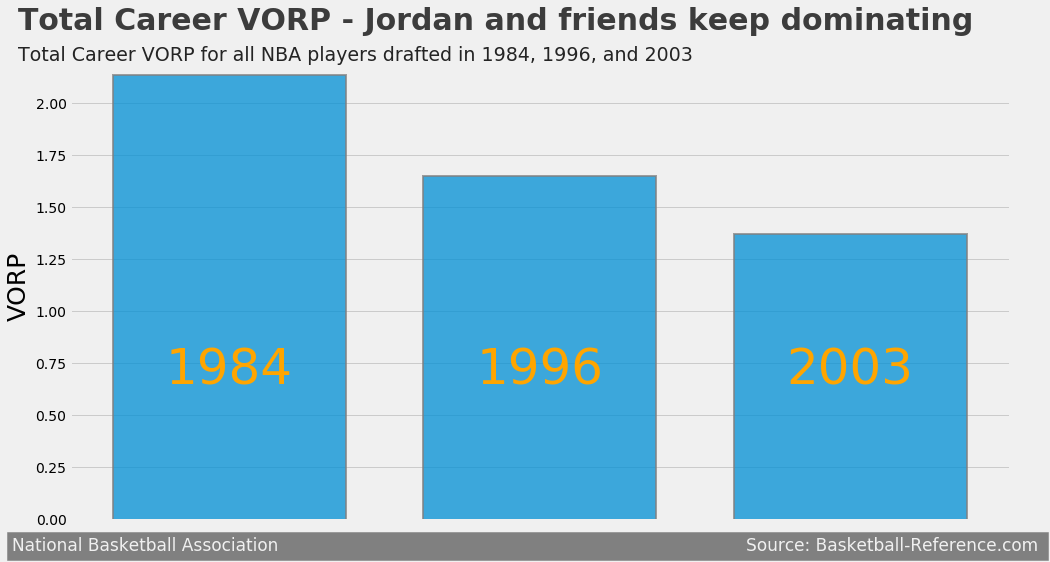

In [9]:
vorp = data_draft.sort_values([('VORP','mean')], ascending = False).reset_index()
pos1 = list(range(len(vorp['VORP','mean'])))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos1, vorp['VORP','mean'], width = 0.75, alpha = 0.75, label = vorp['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos1:
    plt.text(pos1[i], .6, s = vorp['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size = 50)
plt.text(x = -0.68, y = 2.35, s = 'Total Career VORP - Jordan and friends keep dominating',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.68, y = 2.2, s = 'Total Career VORP for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.7, y = -.15, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('VORP', size = 25)

#### Win Shares Per 48 Minutes (WS/48)

Text(0,0.5,'WS/48')

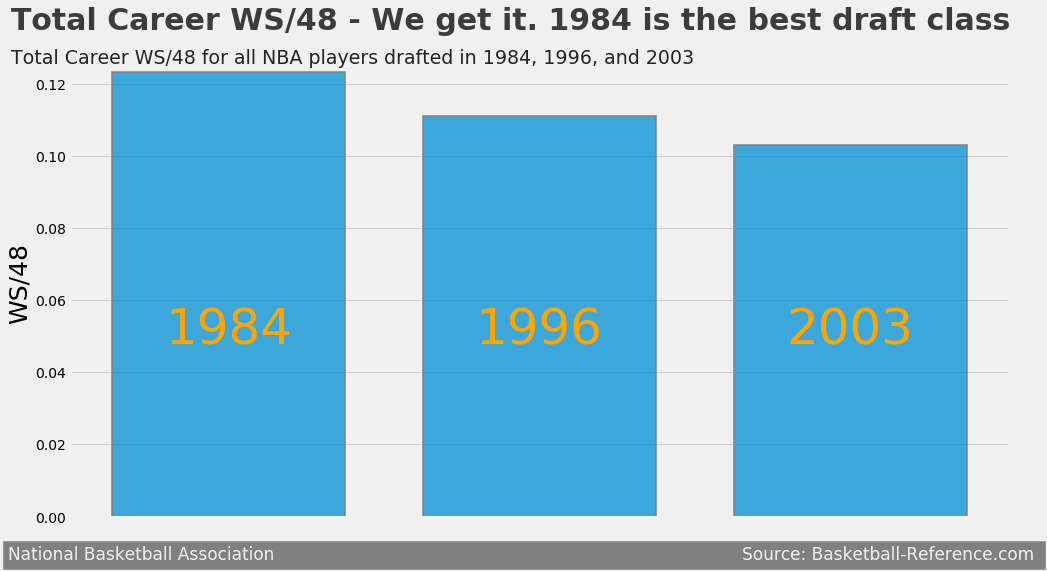

In [10]:
ws = data_draft.sort_values([('WS/48','mean')], ascending = False).reset_index()
pos = list(range(len(ws['WS/48','mean'])))

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, ws['WS/48','mean'], width = 0.75, alpha = 0.75, label = ws['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos:
    plt.text(pos[i], 0.045, s = ws['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size =50)

plt.text(x = -0.7, y = 0.135, s = 'Total Career WS/48 - We get it. 1984 is the best draft class',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.7, y = 0.1255, s = 'Total Career WS/48 for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.71, y = -.012, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('WS/48', size = 25)

### Conclusion

Okay, maybe Shaq, Kenny, and Charles could have a point when they say players from back in the day are better. Although my analysis clearly shows that the draft class of 1984 was better in PER, VORP, and WS/48, there are some issues. First, some rules that are currently set forth in today’s NBA didn’t exist back in the day. For example, the three-point foul, clear path foul, and defensive 3 second rule were all *not* part of the NBA in the early 1990s. Each one of these rules lead to extra free throws, which can increase or decrease your PER (depending if the free throw is made).

Should I have brought these issues up before doing my analysis? Maybe. However, this justifies my whole point of this analysis: let’s stop comparing generations and just enjoy the show! All these generations are different and that’s honestly the best part about basketball. Magic and Bird were different. Jordan was different. Lebron was different. And now, Steph Curry is different. Basketball shouldn’t focus too much on the past, but more on what’s ahead. 
